# Linear Regression

<span>Below is an example of a regression problem using linear regression to predict house prices from a dataset provided on Kaggle. The dataset can be found at the link below. Note that I have tried to reduce the amount of regularization found in sklearn's implementation of the model. As well as attempting to compare and contrast the performance of both statsmodel's linear regression model and sklearn's linear regression model. I try to avoid a lot of feature engineering here, as this notebook is just an example of the models.</span>

### Import Preliminaries

In [29]:
%matplotlib inline
%config InlineBackend.figure_format='retina'

# Import modules
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib as mpl
import numpy as np
import pandas as pd 
import seaborn as sns
import statsmodels.api as sm
import warnings

from sklearn.datasets import load_diabetes
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from statsmodels.regression import linear_model

# Import models
from sklearn.linear_model import LinearRegression


# Set pandas options
pd.set_option('max_columns',1000)
pd.set_option('max_rows',100)

# Set plotting options
mpl.rcParams['figure.figsize'] = (9.0, 6.0)

# Set warning options
warnings.filterwarnings('ignore');

### Import Data

In [44]:
# Import diabetet data
diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target

# Conduct a train-test-split on the data
train_x, test_x, train_y, test_y = train_test_split(X,y, test_size=0.25)

# View the training dataframe
pd.DataFrame(train_x, columns=diabetes['feature_names']).head(5)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,-0.096328,-0.044642,-0.076264,-0.043542,-0.045599,-0.034821,0.008142,-0.039493,-0.059473,-0.083920
1,0.067136,-0.044642,-0.061174,-0.040099,-0.026336,-0.024487,0.033914,-0.039493,-0.056158,-0.059067
2,0.009016,0.050680,0.018584,0.039087,0.017694,0.010586,0.019187,-0.002592,0.016305,-0.017646
3,-0.067268,-0.044642,-0.054707,-0.026328,-0.075870,-0.082106,0.048640,-0.076395,-0.086829,-0.104630
4,-0.063635,-0.044642,0.035829,-0.022885,-0.030464,-0.018850,-0.006584,-0.002592,-0.025952,-0.054925


### Target Outcomes

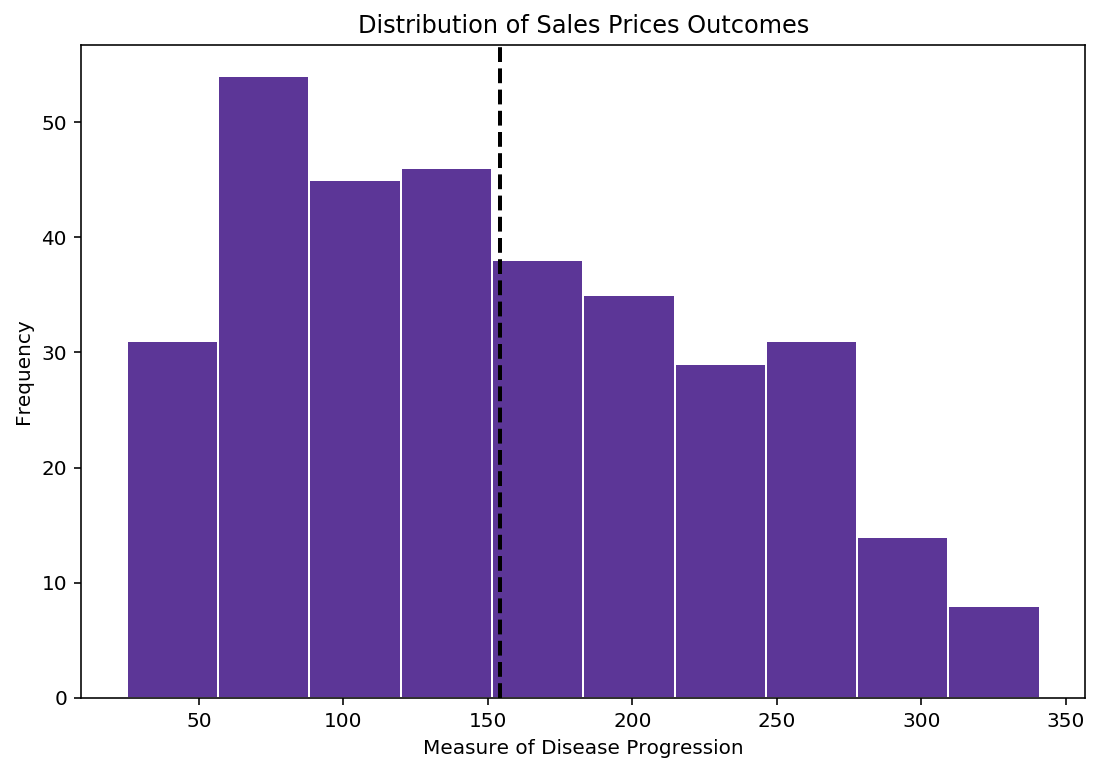

In [45]:
# Plot a histogram of all the home price valuse
pd.Series(train_y).plot.hist(grid=False, color='#5C3697', edgecolor='w',)
plt.title('Distribution of Sales Prices Outcomes')
plt.ylabel('Frequency')
plt.xlabel('Measure of Disease Progression')
plt.axvline(pd.Series(train_y).mean(), color='black', linestyle='dashed', linewidth=2);

### Fit the Model

In [119]:
# Fit a intial linear model
lr_model = LinearRegression()
lr_model.fit(train_x, train_y);

### Model Evaluation

##### Cross Validatino Score

In [47]:
# Calculate our cross validation score
scores = cross_val_score(lr_model, train_x, train_y, cv=10, 
                scoring='r2').mean()
print(f'Cross Validation Score: {scores.mean():.5f}')

Cross Validation Score: 0.44241


#### Viewing Residuals

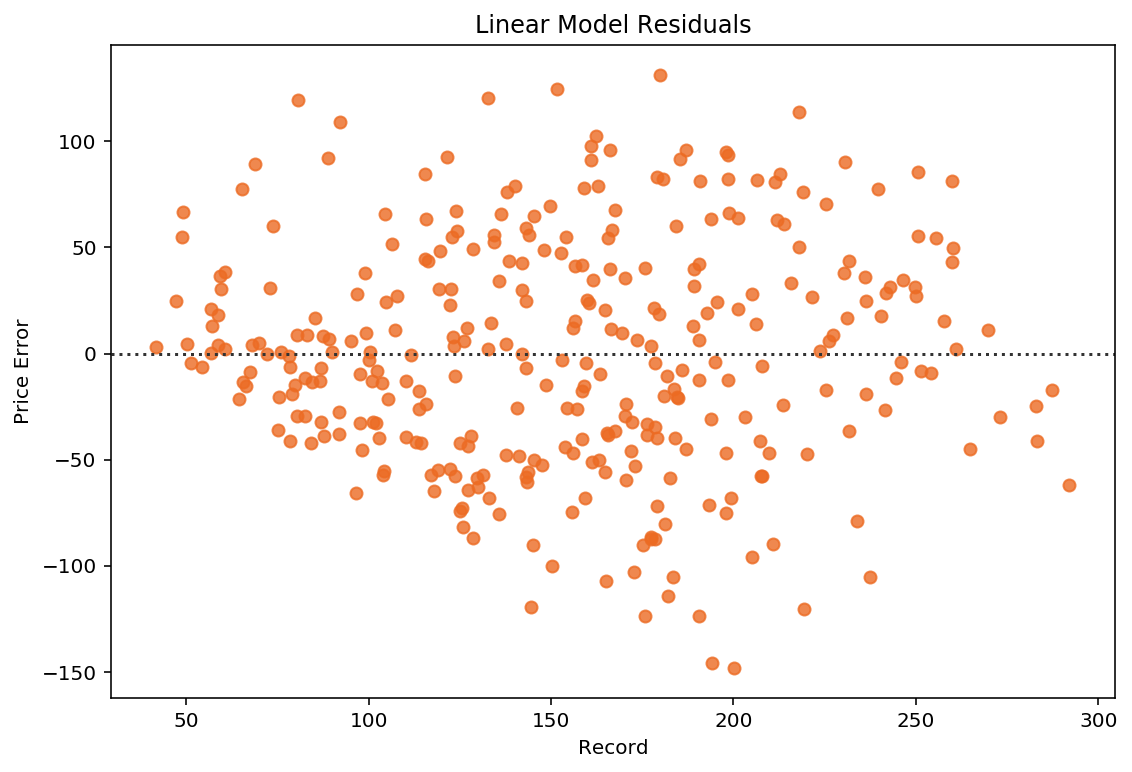

In [138]:
# Plotting residuals from our model
pred_y = lr_model.predict(train_x)
sns.residplot(pred_y, train_y, color='#EC6B23');
plt.title('Linear Model Residuals')
plt.ylabel('Price Error')
plt.xlabel('Record');

##### Coefficient Magnitude

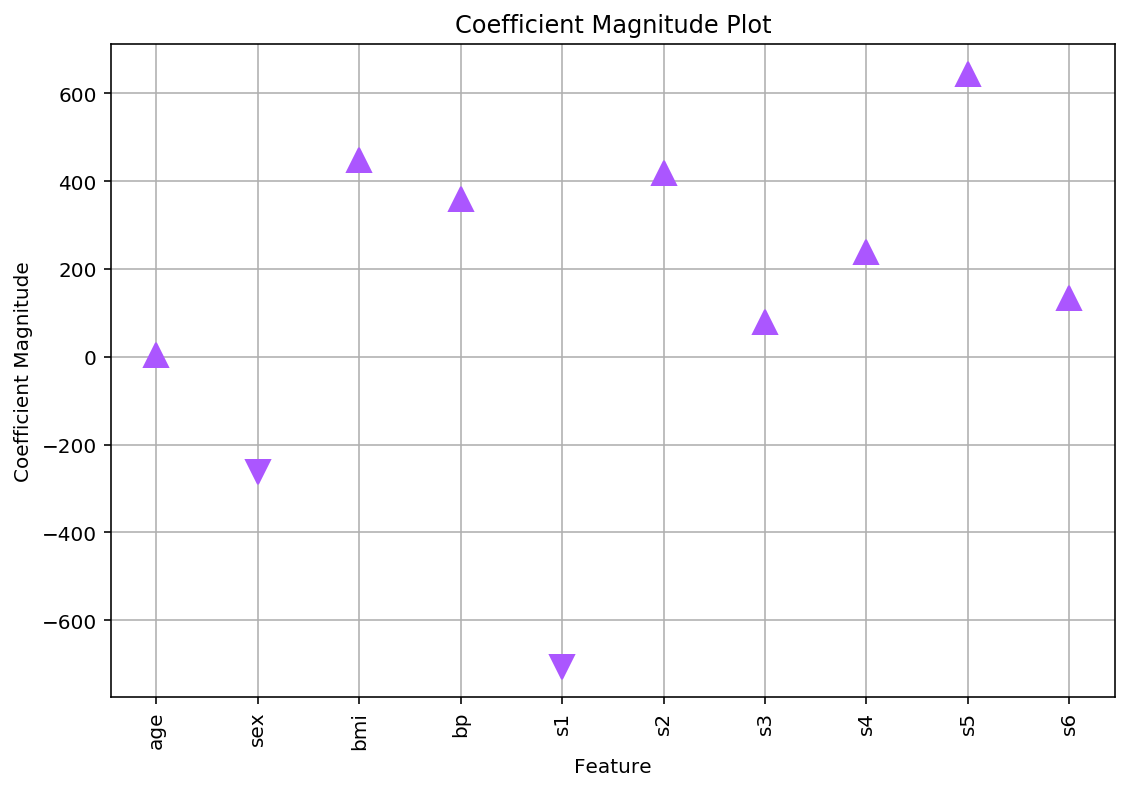

In [140]:
# Plot our coefficient magnitude with variating markes
markers = ['^' if i >=0 else 'v' for i in lr_model.coef_.T]
for i, j in enumerate(markers):
    plt.plot(i,lr_model.coef_[i], marker=markers[i],color='#AB56FF', linewidth=0, markersize=12)
    plt.xticks(range(diabetes.data.shape[1]), diabetes.feature_names, rotation=90);
plt.title('Coefficient Magnitude Plot')
plt.ylabel('Coefficient Magnitude')
plt.xlabel('Feature')
plt.grid();

### Alternative: Stat Models

Using thest stats models can give us a bit more information about the linear regression then sklearn. So lets give it a try.

In [35]:
# Add constant to trainin data
train_x = sm.add_constant(train_x)

# Conduct linear regression via stats model's API
myregression = linear_model.OLS(train_y, train_x).fit()
myregression.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.491
Model:                            OLS   Adj. R-squared:                  0.475
Method:                 Least Squares   F-statistic:                     30.87
Date:                Fri, 14 Sep 2018   Prob (F-statistic):           2.04e-41
Time:                        03:23:23   Log-Likelihood:                -1789.9
No. Observations:                 331   AIC:                             3602.
Df Residuals:                     320   BIC:                             3644.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        150.5598      3.031     49.673      0.000     144.597     156.523
x1            31.7399     69.566      0.456      0.649    -105.125     168.605
x2          -236.5494     72.253     -3.274      0.001    -378.701     -94.398
x3           446.3103     79.031      5.647      0.000     290.825     601.796
x4           295.4427     76.561      3.859      0.000     144.817     446.068
x5          -675.5435    467.648     -1.445      0.150   -1595.597     244.510
x6           417.1572    375.507      1.111      0.267    -321.617    1155.931
x7            28.3191    250.412      0.113      0.910    -464.342     520.980
x8           198.1218    188.159      1.053      0.293    -172.063     568.307
x9           664.9285    199.674      3.330      0.001     272.088    1057.769
x10           57.9191     76.393      0.758      0.449     -92.376     208.214
==============================================================================
Omnibus:                        3.552   Durbin-Watson:                   2.083
Prob(Omnibus):                  0.169   Jarque-Bera (JB):                2.577
Skew:                           0.031   Prob(JB):                        0.276
Kurtosis:                       2.572   Cond. No.                         218.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### General Notes

- The simplest and most classic linear model
- The algorithm minimizes the mean squared error
- You can use either Sklearn or Stats Models for the type of problem. Stats models is a bit more informative

Author: Kavi Sekhon